<a href="https://colab.research.google.com/github/Anusha-Kasina/weed_detection/blob/master/Final_weed_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
#kaggle username from api token 
os.environ['KAGGLE_USERNAME'] = "anushakasina"
#kaggle key from api token
os.environ['KAGGLE_KEY'] ="ddb898e4090e073a6d8ebd4a4a47701c"
#dataset path for downloading the data
!kaggle datasets download -d fpeccia/weed-detection-in-soybean-crops

100% 2.36G/2.37G [00:32<00:00, 26.6MB/s]
100% 2.37G/2.37G [00:32<00:00, 77.6MB/s]


### from kaggle click on "create New API Token" as shown below and get username and key 

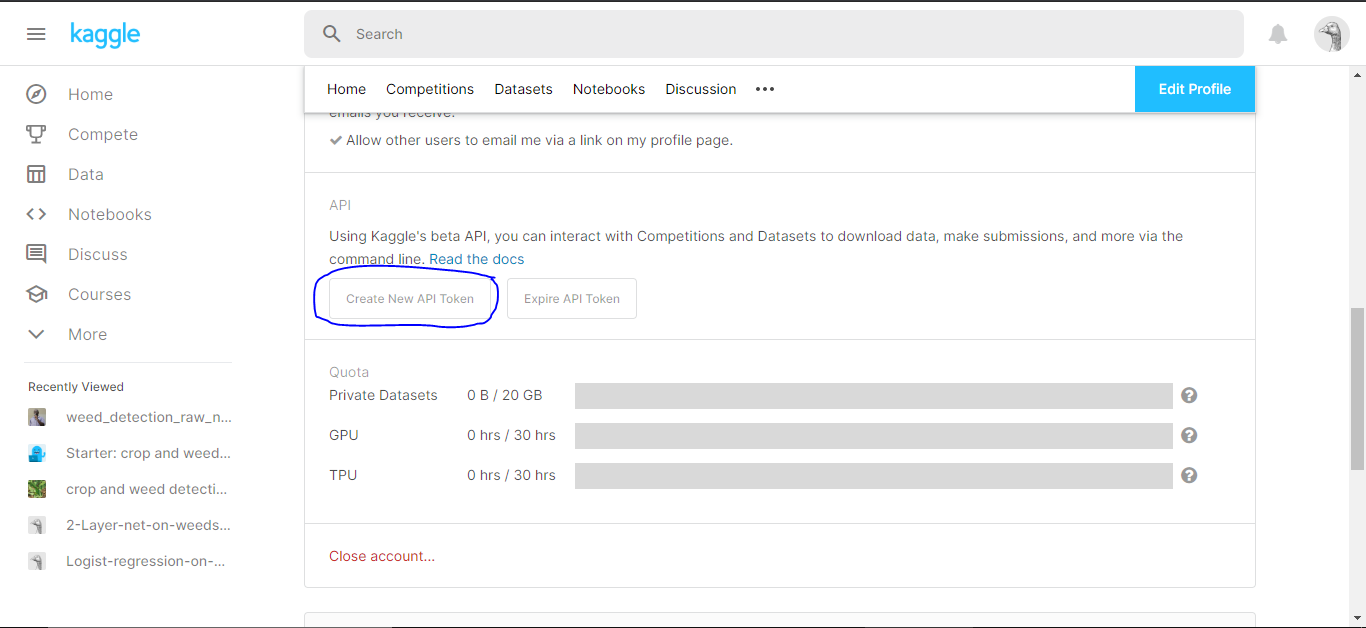

## Extracting the folder downloaded

In [0]:
from zipfile import ZipFile
#filename = zip file path 
file_name = "/content/weed-detection-in-soybean-crops.zip"
#to extract the zip file
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


### Creating training and test directories

In [0]:
os.mkdir("/content/train_data")
os.mkdir("/content/train_data/broadleaf")
os.mkdir("/content/train_data/grass")
os.mkdir("/content/train_data/soil")
os.mkdir("/content/train_data/soybean")


In [0]:
os.mkdir("/content/test_data")
os.mkdir("/content/test_data/broadleaf")
os.mkdir("/content/test_data/grass")
os.mkdir("/content/test_data/soil")
os.mkdir("/content/test_data/soybean")

In [0]:
from shutil import copyfile 
import random

### Splitting the orginal data set as 80% of the dataset for train data and 20% of the dataset for test data

In [0]:
def split_data(source,training,testing,split_size):
  files = []
  for filename in os.listdir(source):
    file = source+filename
    files.append(filename)
    #calculating the total number of images in the original dataset
    training_length = int(len(files)*split_size)
    shuffled_set = random.sample(files,len(files))
    #80% of the images to training set
    training_set = shuffled_set[0:training_length]
    #20% of the images to testing set
    testing_set = shuffled_set[training_length:]
  #appending to training directory
  for filename in training_set:
    #source file name
    this_file = source+filename 
    #destination file name
    destination = training+filename 
    #coping from source to destination
    copyfile(this_file,destination) 
  #appending to testing directory        
  for filename in testing_set:
    #source file name
    this_file = source+filename 
    #destination file name
    destination = testing+filename 
    #coping from source to destination
    copyfile(this_file,destination)
#split_size = 0.8
split_data("/content/dataset/broadleaf/","/content/train_data/broadleaf/","/content/test_data/broadleaf/",0.8)
split_data("/content/dataset/grass/","/content/train_data/grass/","/content/test_data/grass/",0.8)
split_data("/content/dataset/soil/","/content/train_data/soil/","/content/test_data/soil/",0.8)
split_data("/content/dataset/soybean/","/content/train_data/soybean/","/content/test_data/soybean/",0.8)
print("done")

done


In [0]:
print("train-data-broadleaf",len(os.listdir('/content/train_data/broadleaf')),end=",")
print("test-data-broadleaf",len(os.listdir('/content/test_data/broadleaf')),end="\n")
print("train-data-grass",len(os.listdir('/content/train_data/grass')),end=",")
print("test-data-grass",len(os.listdir('/content/test_data/grass')),end="\n")
print("train-data-soil",len(os.listdir('/content/train_data/soil')),end=",")
print("test-data-soil",len(os.listdir('/content/test_data/soil')),end="\n")
print("train-data-soybean",len(os.listdir('/content/train_data/soybean')),end=",")
print("test-data-soybean",len(os.listdir('/content/test_data/soybean')),end="\n")

train-data-broadleaf 952,test-data-broadleaf 239
train-data-grass 2816,test-data-grass 704
train-data-soil 2599,test-data-soil 650
train-data-soybean 5900,test-data-soybean 1476


In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

Using TensorFlow backend.


In [0]:
#train and test directories path
train_dir = '/content/train_data'
test_dir = '/content/test_data'
#normalising data by rescaling every image
train_gen_obj = ImageDataGenerator(rescale = 1.0/255.0)
test_gen_obj = ImageDataGenerator(rescale = 1.0/255.0)
#flow_from_directory command generates batches of randomly transformed images and saves the results to your preview directory
train_gen = train_gen_obj.flow_from_directory(train_dir, batch_size = 128, target_size = (150, 150), class_mode = 'categorical')
test_gen = test_gen_obj.flow_from_directory(test_dir, batch_size = 64, target_size = (150, 150), class_mode = 'categorical')

Found 12267 images belonging to 4 classes.
Found 3069 images belonging to 4 classes.


In [0]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

## Conv2D Model

In [0]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(150, 150,3)))
# activation is relu
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# The second convolution
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# The third convolution
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the results to feed into a DNN
model.add(Flatten())
# 64 neuron hidden layer
model.add(Dense(64))
model.add(Activation('relu'))
# 4 output neurons. It will either the broadleaf or grassor soil or soybean
model.add(Dense(4))
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
# Compile Model. 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
# Train the Model
history = model.fit_generator(train_gen,
                              validation_data = test_gen,
                              epochs = 10, verbose = 1)

Epoch 1/10
96/96 [==============================] - 63s 655ms/step - loss: 0.5512 - acc: 0.7834 - val_loss: 0.4628 - val_acc: 0.8143
Epoch 2/10
96/96 [==============================] - 57s 597ms/step - loss: 0.3049 - acc: 0.8884 - val_loss: 0.2784 - val_acc: 0.9000
Epoch 3/10
96/96 [==============================] - 57s 596ms/step - loss: 0.2378 - acc: 0.9095 - val_loss: 0.1996 - val_acc: 0.9172
Epoch 4/10
96/96 [==============================] - 58s 603ms/step - loss: 0.1939 - acc: 0.9287 - val_loss: 0.3155 - val_acc: 0.9270
Epoch 5/10
96/96 [==============================] - 58s 600ms/step - loss: 0.1657 - acc: 0.9402 - val_loss: 0.0963 - val_acc: 0.9306
Epoch 6/10
96/96 [==============================] - 58s 601ms/step - loss: 0.1232 - acc: 0.9557 - val_loss: 0.1656 - val_acc: 0.9211
Epoch 7/10
96/96 [==============================] - 58s 603ms/step - loss: 0.0932 - acc: 0.9676 - val_loss: 0.5109 - val_acc: 0.9270
Epoch 8/10
96/96 [==============================] - 58s 602ms/step - 

## Plot for accuracy and loss on both training and validation

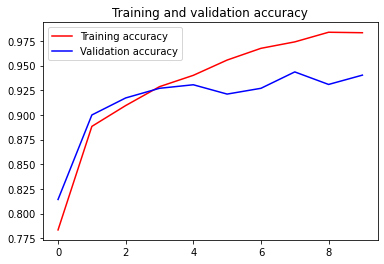

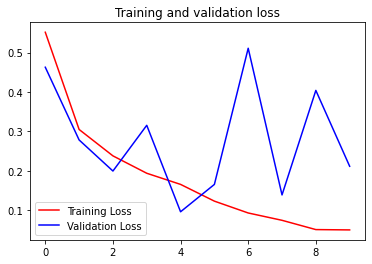

In [0]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Checking model with drone captured images

In [0]:
import os
#directory to store the images taken by drone
os.mkdir("testing_outputs")

In [0]:
source = "/content/testing_outputs/"
from skimage.transform import resize
from skimage.transform import resize
for filename in os.listdir(source):
  #changing path to current directory
  os.chdir(source)
  #extracting the path
  this_file = source+filename 
  #extracting the image name
  this_file = this_file[25:]
  #storing image to new_image
  new_image=plt.imread(this_file)
  print(this_file)
  
  #to resize the image to match model input size
  resized_image = resize(new_image, (150,150,3))
  #to predict the input image using our model
  predictions = model.predict(np.array( [resized_image] ))
  #list_index defines 0 for broadleaf, 1 for grass,2 for soil,3 for soybean
  list_index = [0,1,2,3]
  #storing predicted output by the model to x
  x = predictions
  # arranging the list in such a way that highest probability list index comes to first position of the list
  for i in range(4):
    for j in range(4):
      if x[0][list_index[i]] > x[0][list_index[j]]:
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp
  #Show the sorted labels in order from highest probability to lowest
  print(list_index)
  print(classification[list_index[0]])
  if(classification[list_index[0]]=='broad'):
    print('weed')
    
    print('...........')
    

  else:
    print("non weed")
    print('...........')  
    
    

101 (1).tif
[3, 1, 0, 2]
soya
non weed
...........
4327.tif
[3, 1, 0, 2]
soya
non weed
...........
102.tif
[0, 1, 3, 2]
broad
weed
...........
1.tif
[0, 1, 3, 2]
broad
weed
...........
1025.tif
[0, 1, 3, 2]
broad
weed
...........
106.tif
[1, 0, 3, 2]
grass
non weed
...........
1038.tif
[0, 1, 3, 2]
broad
weed
...........
100.tif
[0, 3, 1, 2]
broad
weed
...........
1018.tif
[2, 0, 1, 3]
soil
non weed
...........
3565.tif
[3, 1, 0, 2]
soya
non weed
...........


## Using "VGG16" model

In [0]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
import os

In [0]:
#building vgg16 model
model_vgg16 = tf.keras.applications.VGG16(include_top=False, input_shape=(150,150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
for layer in model_vgg16.layers:
    layer.trainable = False

In [0]:
#activation function
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.3)
leaky_relu.__name__ = 'leaky_relu'
#flatten the layers
flat1 = tf.keras.layers.Flatten()(model_vgg16.layers[-1].output)
#256 neuron layers
class1 = tf.keras.layers.Dense(256, activation=leaky_relu)(flat1)
#using dropouts
drop1 = tf.keras.layers.Dropout(0.5)(class1)
class2 = tf.keras.layers.Dense(256, activation=leaky_relu)(drop1)
drop2 = tf.keras.layers.Dropout(0.5)(class2)
#using softmax function 
output = tf.keras.layers.Dense(4, activation='softmax')(drop2)

model_vgg16 = tf.keras.models.Model(inputs=model_vgg16.inputs, outputs=output)

In [0]:
# model summary
model_vgg16.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
#compile the model
adadelta = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model_vgg16.compile(optimizer=adadelta, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# train the model
history = model_vgg16.fit(train_gen, epochs=5,
                          validation_data=test_gen)

Epoch 1/5
96/96 [==============================] - 83s 862ms/step - loss: 0.5212 - accuracy: 0.8426 - val_loss: 0.0936 - val_accuracy: 0.9638
Epoch 2/5
96/96 [==============================] - 73s 761ms/step - loss: 0.1450 - accuracy: 0.9526 - val_loss: 0.0547 - val_accuracy: 0.9804
Epoch 3/5
96/96 [==============================] - 72s 752ms/step - loss: 0.1366 - accuracy: 0.9597 - val_loss: 0.0539 - val_accuracy: 0.9831
Epoch 4/5
96/96 [==============================] - 72s 754ms/step - loss: 0.1176 - accuracy: 0.9630 - val_loss: 0.0502 - val_accuracy: 0.9814
Epoch 5/5
96/96 [==============================] - 73s 761ms/step - loss: 0.0931 - accuracy: 0.9720 - val_loss: 0.0527 - val_accuracy: 0.9818


In [0]:

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

## Plot for accuracy and loss on both training and validation

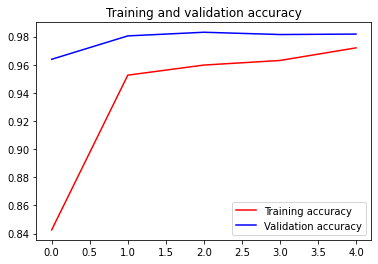

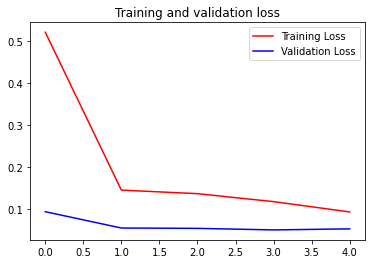

In [0]:
#plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Checking model with drone captured images

In [0]:
import os
#directory to store the images taken by drone
os.mkdir("testing_outputs")

In [0]:
source = "/content/testing_outputs/"
from skimage.transform import resize
from skimage.transform import resize
for filename in os.listdir(source):
  #changing path to current directory
  os.chdir(source)
  #extracting the path
  this_file = source+filename 
  #extracting the image name
  this_file = this_file[25:]
  #storing image to new_image
  new_image=plt.imread(this_file)
  print(this_file)
  
  #to resize the image to match model input size
  resized_image = resize(new_image, (150,150,3))
  #to predict the input image using our model
  predictions = model.predict(np.array( [resized_image] ))
  #list_index defines 0 for broadleaf, 1 for grass,2 for soil,3 for soybean
  list_index = [0,1,2,3]
  #storing predicted output by the model to x
  x = predictions
  # arranging the list in such a way that highest probability list index comes to first position of the list
  for i in range(4):
    for j in range(4):
      if x[0][list_index[i]] > x[0][list_index[j]]:
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp
  #Show the sorted labels in order from highest probability to lowest
  print(list_index)
  print(classification[list_index[0]])
  if(classification[list_index[0]]=='broad'):
    print('weed')
    
    print('...........')
    

  else:
    print("non weed")
    print('...........')  
    
    

101 (1).tif
[3, 2, 0, 1]
soya
non weed
...........
4327.tif
[3, 1, 0, 2]
soya
non weed
...........
102.tif
[0, 3, 1, 2]
broad
weed
...........
1.tif
[0, 3, 1, 2]
broad
weed
...........
1025.tif
[0, 1, 3, 2]
broad
weed
...........
106.tif
[0, 1, 3, 2]
broad
weed
...........
1038.tif
[0, 1, 3, 2]
broad
weed
...........
100.tif
[0, 3, 1, 2]
broad
weed
...........
1018.tif
[2, 3, 0, 1]
soil
non weed
...........
3565.tif
[3, 0, 1, 2]
soya
non weed
...........
